In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

**Get prediction data**

In [2]:
model_name = "dmnet"
width_ticks = 10
length_ticks = 2 * width_ticks
files = os.listdir("../logging")
rel_files = [f for f in files if model_name in f]
rel_files.sort()
#directory = "logging/20230810_165359_densnet_Ael8lbyb_md_h2.npz_densities_final"  # Fill this in
# Get latest run
directory = f"../logging/{rel_files[-1]}/preds.npz"
print(directory)
run_date = re.search(r'(.{16})' + model_name, rel_files[-1]).group(1)
run_date = run_date.replace("_", " ")
run_date = run_date[:-1]
run_date = run_date[:4] + "." + run_date[4:6] + "." + run_date[6:11] + ":" + run_date[11:13] + ":" + run_date[13:]

pred_data = np.load(directory, allow_pickle=True)
pred_data_idx = pred_data["data_idx"]
pred_densities = pred_data["pred_densities"]
pred_densities = np.reshape(pred_densities, (pred_densities.shape[0], width_ticks, 2 * width_ticks))

../logging/20231127_121934_dmnet_2TPxH5I2_md_h2.npz_densities_final/preds.npz


In [3]:
orig_data = np.load("../data/md_h2.npz", allow_pickle=True)
orig_densities = orig_data["densities"][pred_data_idx]
orig_densities = np.reshape(orig_densities, (orig_densities.shape[0], width_ticks, length_ticks))
hf_densities = orig_data["hf_densities"][pred_data_idx]
hf_densities = np.reshape(hf_densities, (hf_densities.shape[0], width_ticks, length_ticks))

**Plot predicted densities**

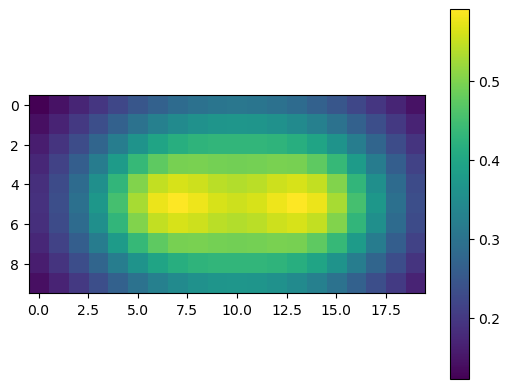

In [4]:
plot_idx = 20

plt.imshow(pred_densities[plot_idx], cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

**Plot real densities**

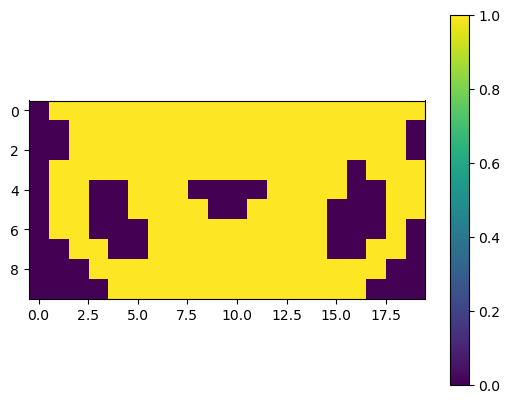

In [5]:
real_plot_data = np.abs(orig_densities[plot_idx] - pred_densities[plot_idx]) / orig_densities[plot_idx]
plt.imshow(real_plot_data < 0.00050, cmap='viridis', interpolation='nearest')

plt.colorbar()
plt.show()

**Plot difference between difference of pred vs real and hf vs real**

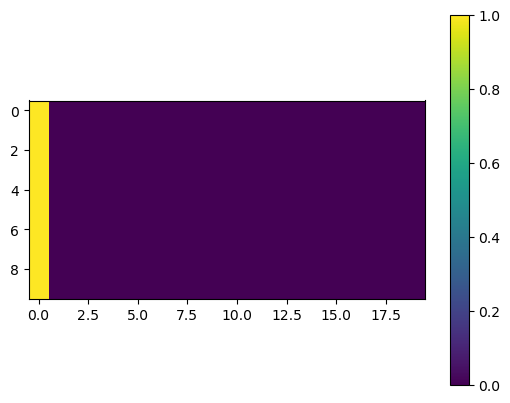

In [6]:
diff_plot_data = np.abs(orig_densities - hf_densities)[plot_idx] / orig_densities[plot_idx]
plt.imshow(diff_plot_data < 0.00050, cmap='viridis', interpolation='nearest')
plt.colorbar()